In [54]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# @author: GJH
# @file: Visual_Decision_tree
# @time: 2023/3/23,21:02
#------------------------------------------------------read_data
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_excel('PlayTennis训练样本_.xlsx').iloc[:,1:]
#______________________________________________________________encode
from sklearn.preprocessing import LabelEncoder
def en_de_code_context(data,unco_context_cols):
    les={}
    for col in unco_context_cols:
        label=LabelEncoder()
        data[col]=label.fit_transform(data[col])
        print('encoded',col)
        les[col]=label
    return data,les
def pre_data(df,type_=1):
    dataset=df.copy() if type_==1 else pd.concat([pd.get_dummies(df.iloc[:,:-1]),df.iloc[:,-1]],axis=1)
    data,les=en_de_code_context(dataset,dataset.columns.to_list())
    return data,les

In [47]:
def build_tree_visual(X,y,le_y,criterion='gini',type_=1):
    from sklearn import tree
    import matplotlib.pyplot as plt
    dct=tree.DecisionTreeClassifier(criterion=criterion)
    dct.fit(X,y)
    plt.figure(figsize=(10,15),dpi=100)
    rule_text=tree.plot_tree(dct,
                   feature_names=X.columns,
                   class_names=le_y.inverse_transform(dct.classes_),
                   filled=True)
    plt.title('Solutions_{}({})'.format(type_,criterion))
    plt.show()
    return  rule_text,plt
def get_axs():
    axs=[]
    for criterion in ['gini','entropy']:
        for type_ in [1,2]:
            data,les=pre_data(df,type_)
            _,ax=build_tree_visual(data.iloc[:,:-1],data.iloc[:,-1],les['PlayTennis'],criterion,type_)
            axs.append(ax)
    return axs

encoded Outlook
encoded Temperature
encoded Humidity
encoded Wind
encoded PlayTennis


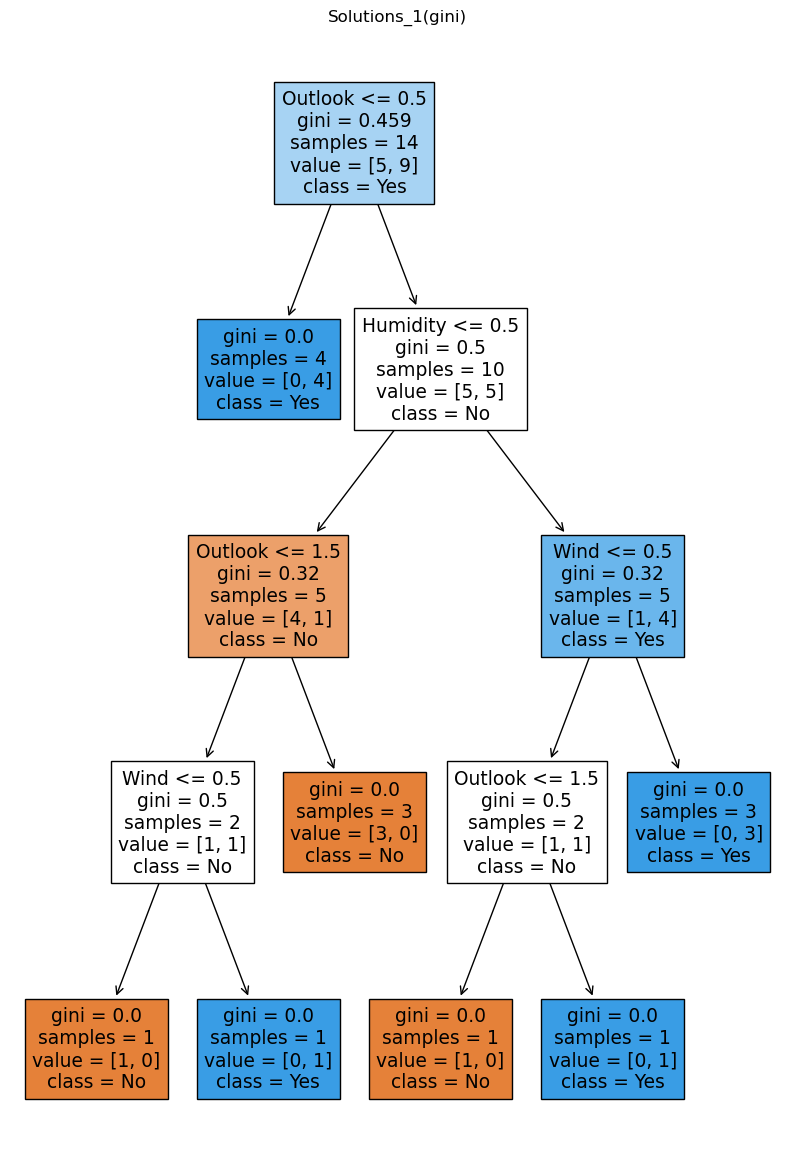

encoded Outlook_Overcast
encoded Outlook_Rain
encoded Outlook_Sunny
encoded Temperature_Cool
encoded Temperature_Hot
encoded Temperature_Mild
encoded Humidity_High
encoded Humidity_Normal
encoded Wind_Strong
encoded Wind_Weak
encoded PlayTennis


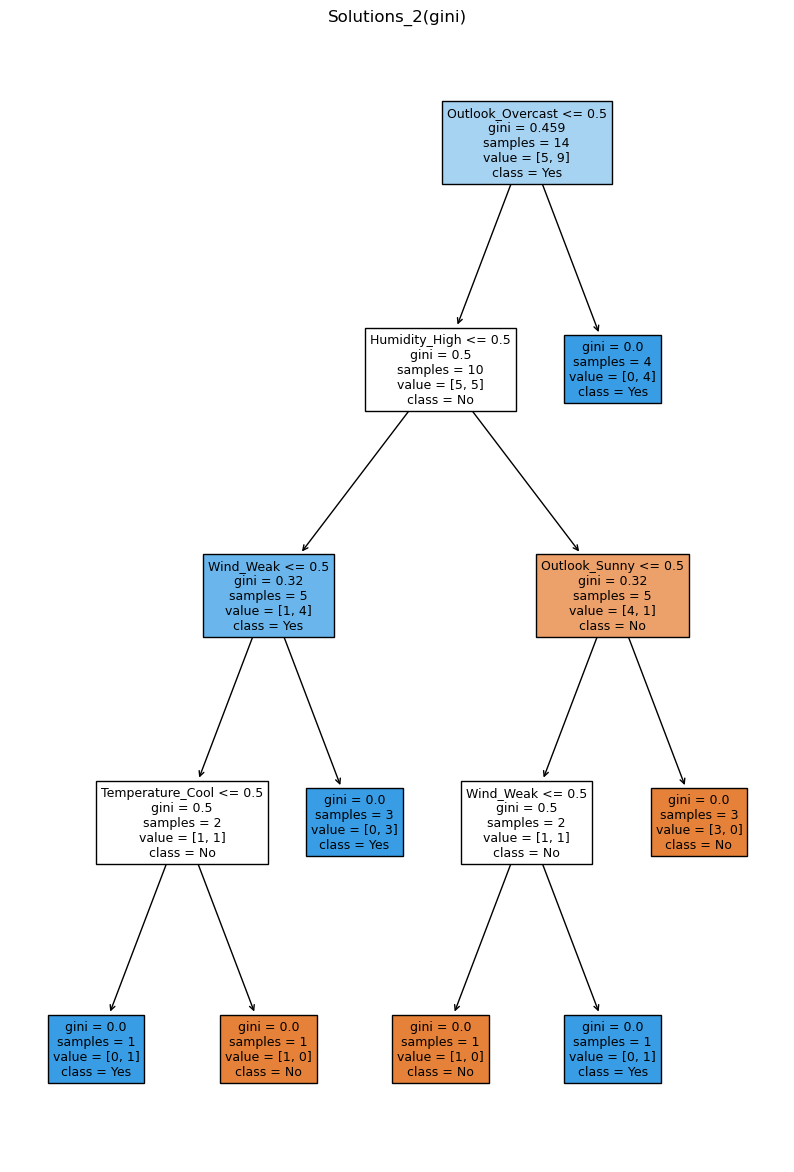

encoded Outlook
encoded Temperature
encoded Humidity
encoded Wind
encoded PlayTennis


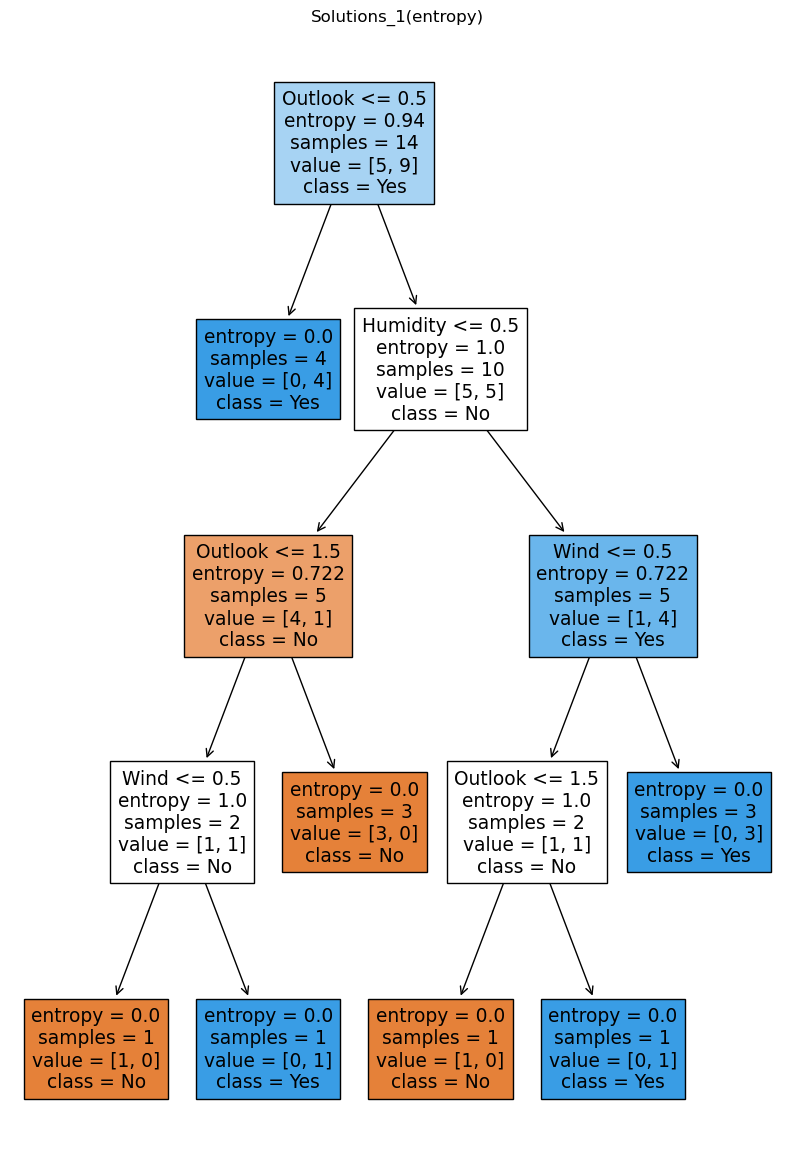

encoded Outlook_Overcast
encoded Outlook_Rain
encoded Outlook_Sunny
encoded Temperature_Cool
encoded Temperature_Hot
encoded Temperature_Mild
encoded Humidity_High
encoded Humidity_Normal
encoded Wind_Strong
encoded Wind_Weak
encoded PlayTennis


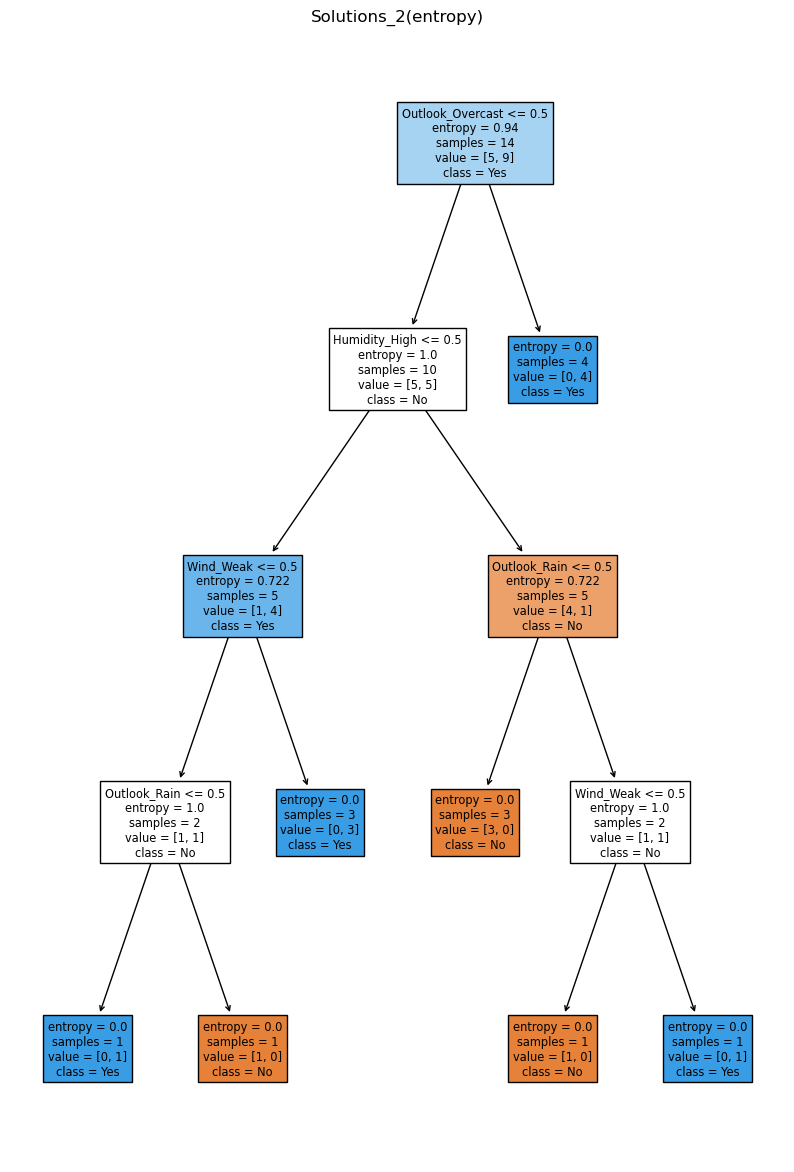

In [57]:
axs=get_axs()
plt.show()